Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [3]:
from google.colab import files
upload = files.upload()

Saving HR_Analytics.csv to HR_Analytics.csv


In [81]:
emp=pd.read_csv('HR_Analytics.csv')

In [82]:
emp.keys()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [83]:
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Handling Missing values (if any)

In [84]:
emp.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

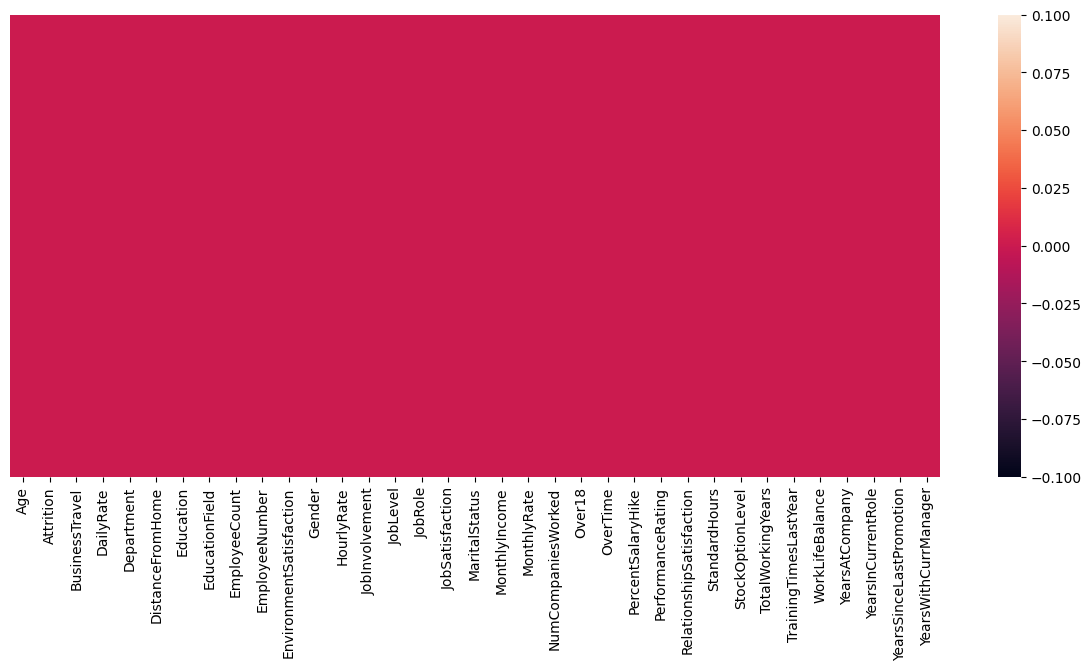

In [85]:
sns.heatmap(emp.isnull(), yticklabels = False)

In [86]:
from sklearn.preprocessing import LabelEncoder
LbEn = LabelEncoder()
emp["Attrition"] = LbEn.fit_transform(emp["Attrition"])
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [87]:
emp.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Exploratory Data Analysis and Visualization

<ipython-input-88-db095ec9b432>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = emp.corr()
<ipython-input-88-db095ec9b432>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),square = True,ax=ax,annot=True)


<Axes: >

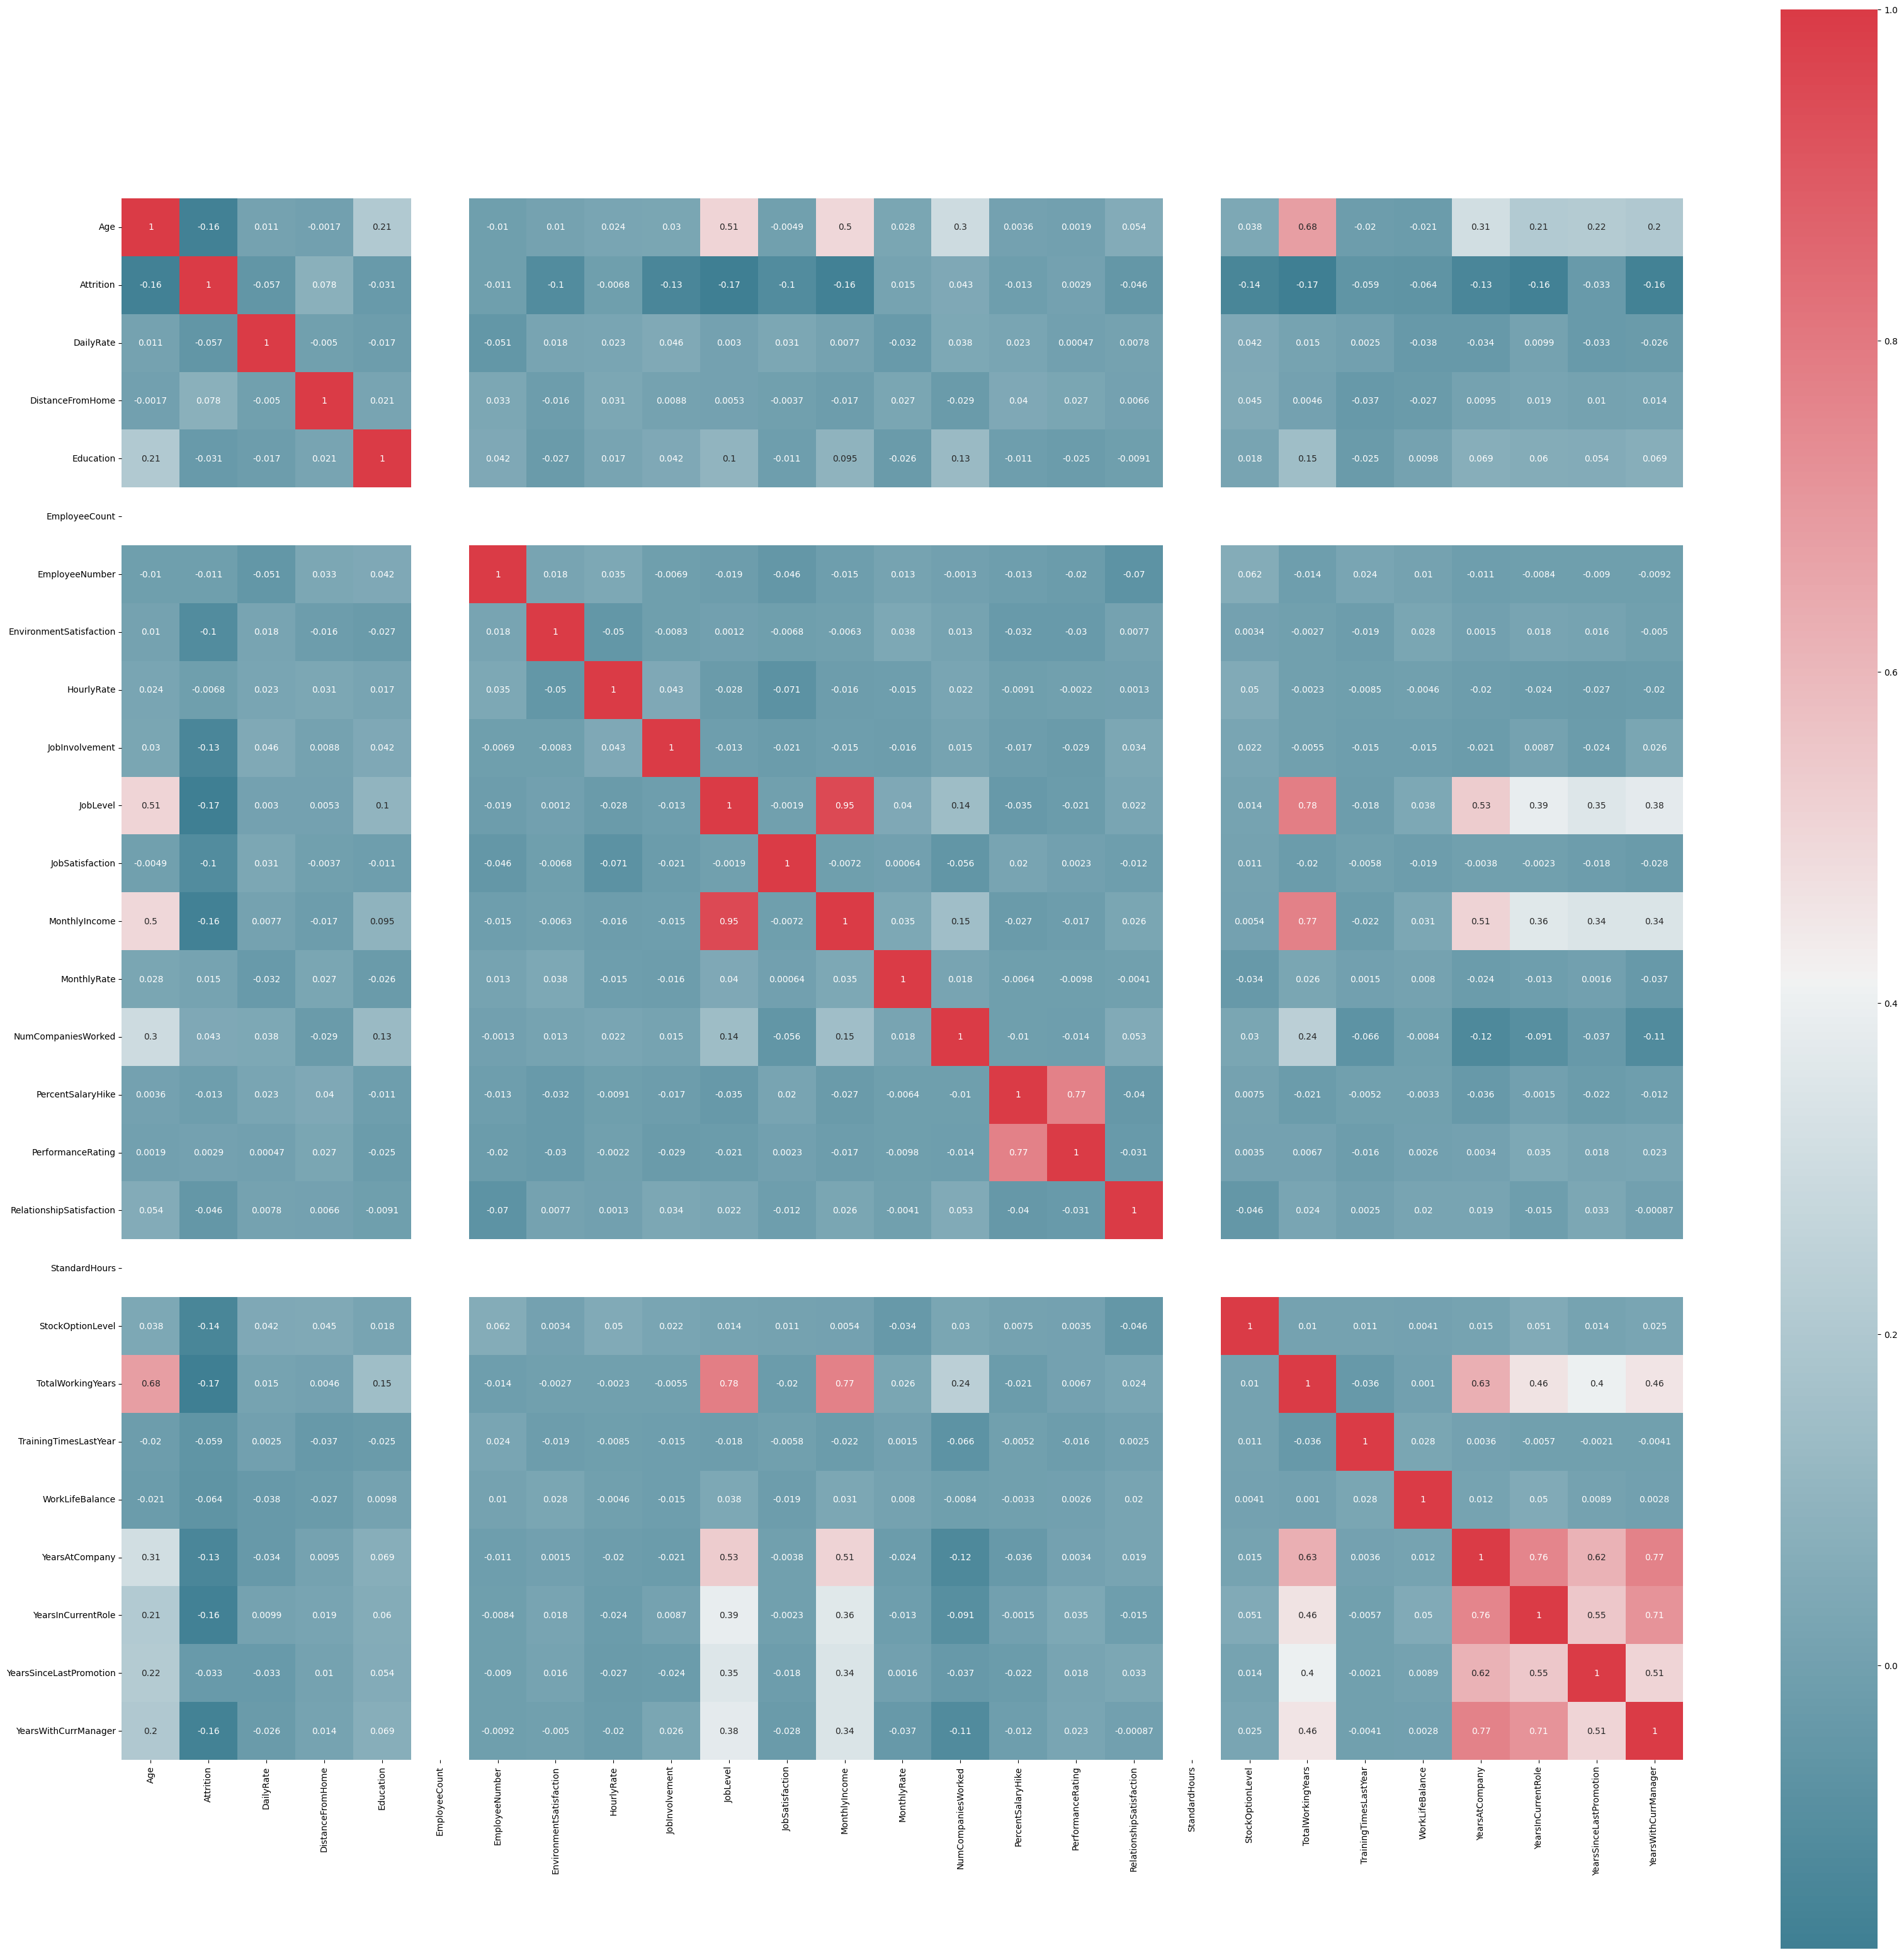

In [88]:
f, ax = plt.subplots(figsize=(40,40))
corr = emp.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),square = True,ax=ax,annot=True)


1. Plotting the distribution of the attrition


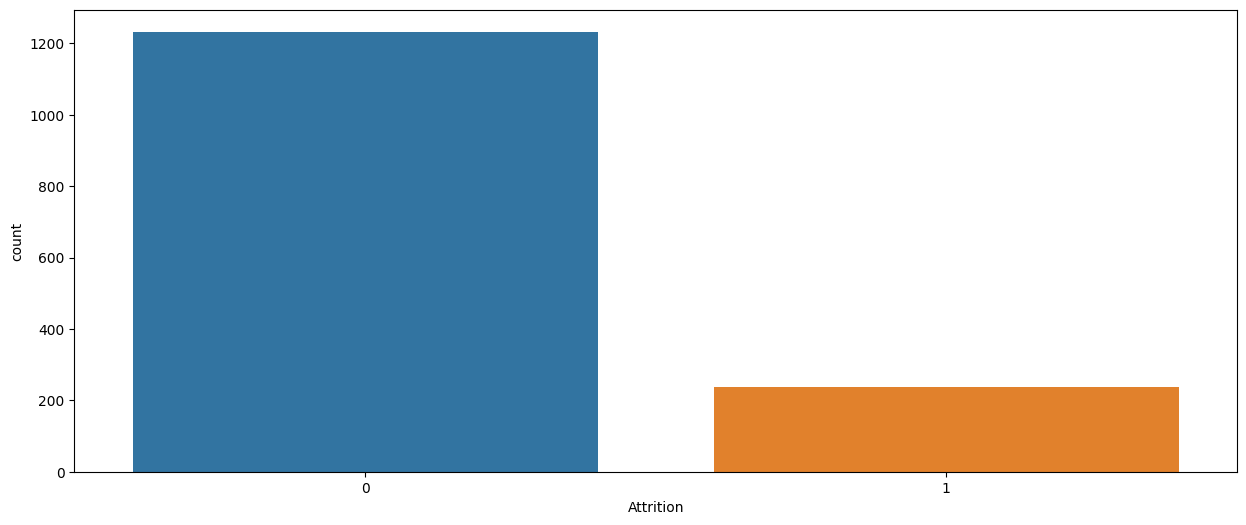

In [89]:
sns.countplot(x ="Attrition",data = emp)
plt.show()

2. Plotting Age and Attrition

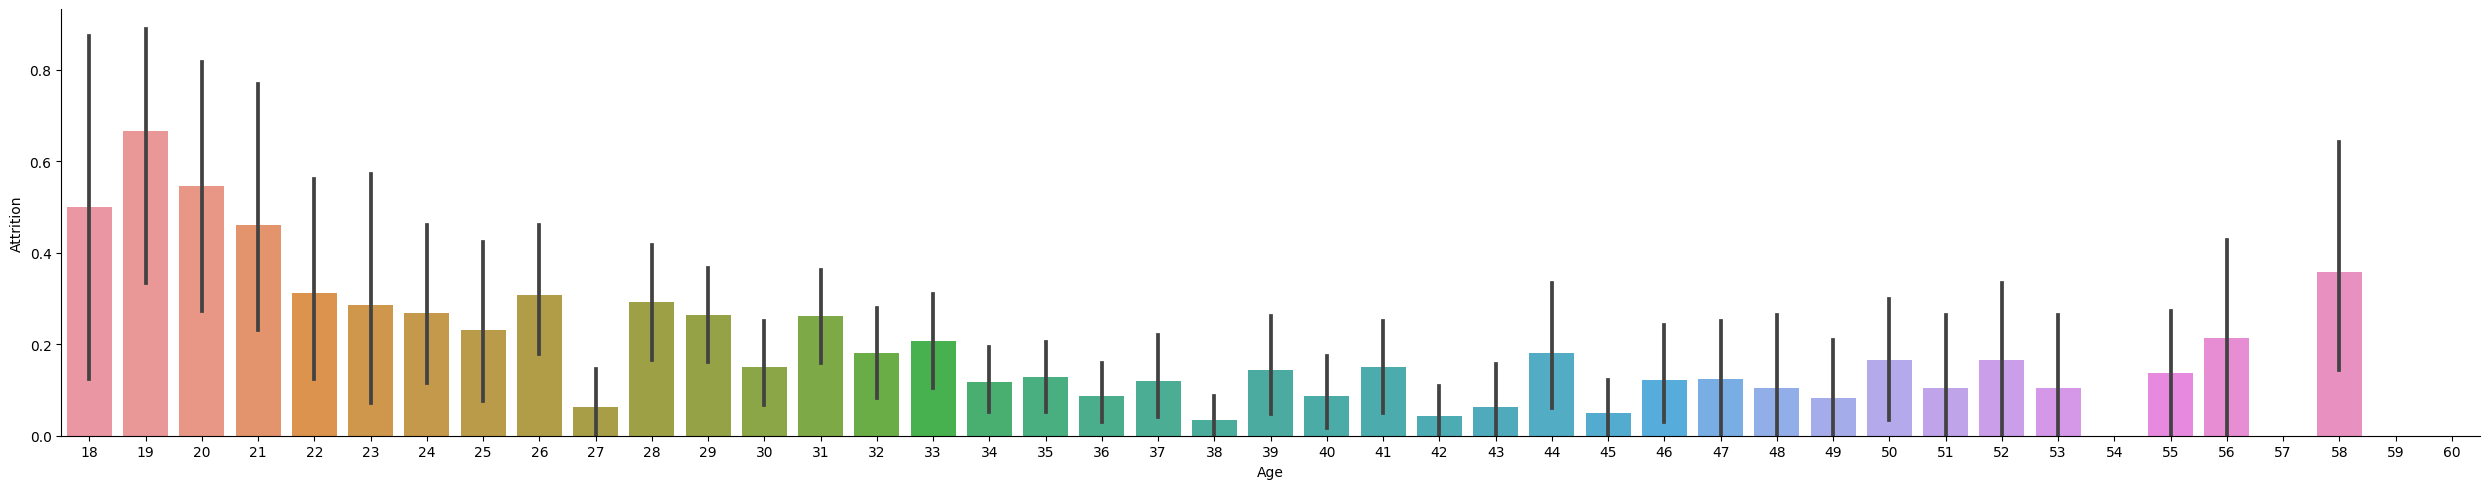

In [90]:
sns.catplot(x = "Age", y = "Attrition", aspect = 5,kind = 'bar',data = emp)
plt.show()

Younger people tend to have higher attrition rate

3. Plotting Department and attrition

Text(0, 0.5, 'Attrition')

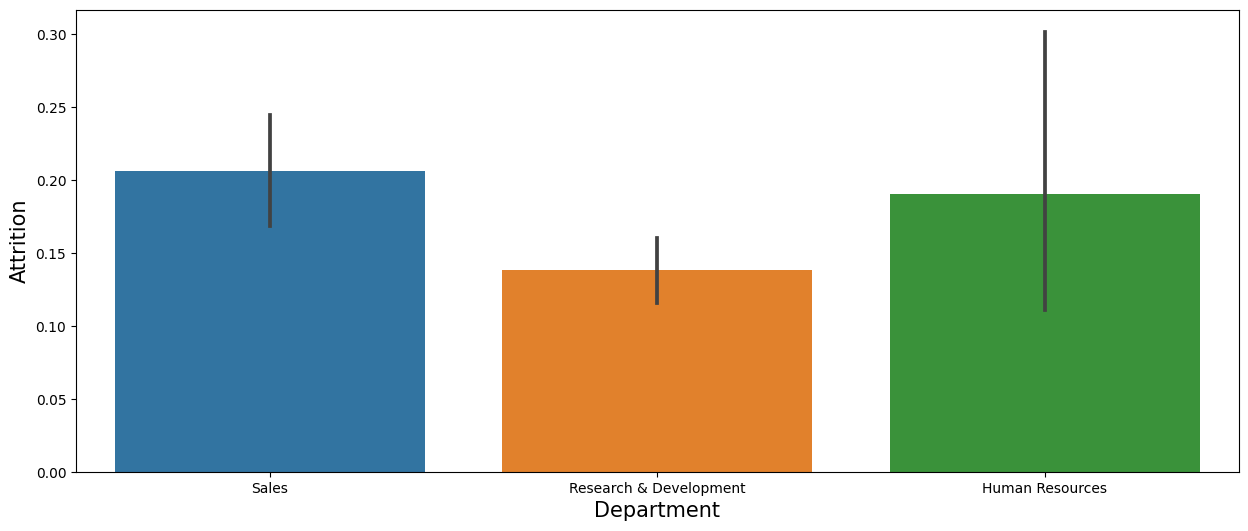

In [91]:
sns.barplot(x="Department", y="Attrition", data=emp)
plt.xlabel("Department", fontsize = 15)
plt.ylabel("Attrition", fontsize = 15)


Sales Department has the highest attrition followed by Human Resources

4. Plotting Job Role and Attrition

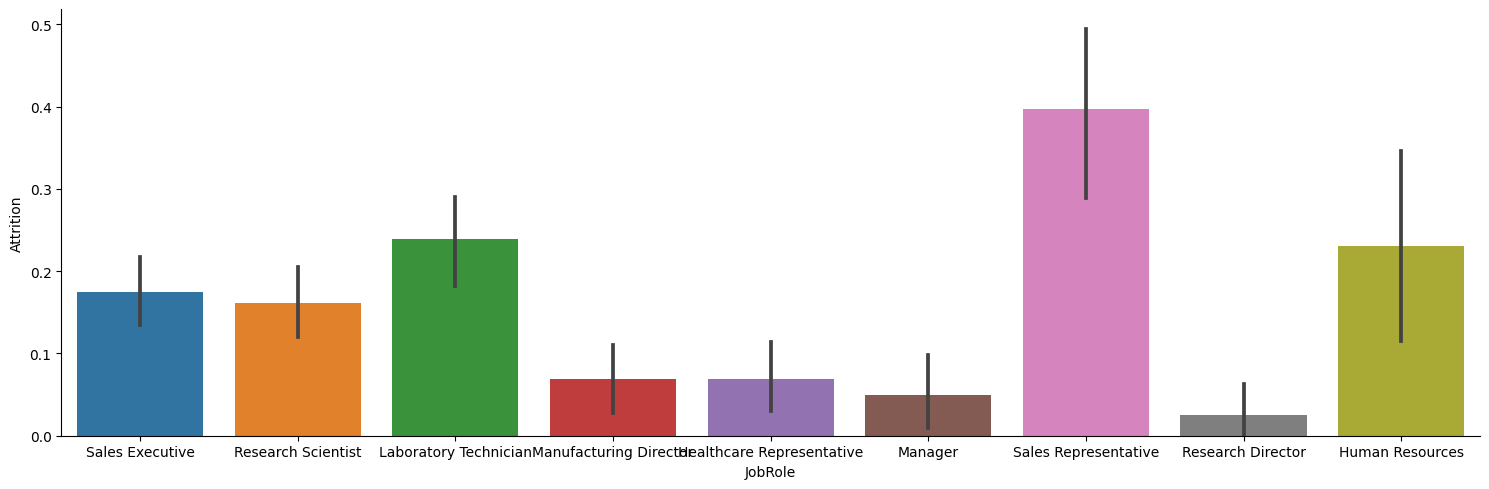

In [16]:
sns.catplot(x = "JobRole", y = "Attrition", aspect = 3,kind = 'bar',data = emp)
plt.show()


The job role with the least attrition is of a ResearchDirector and the one with maximum attrition is of a Sales Representative

5. Plotting years at Company and Attrition

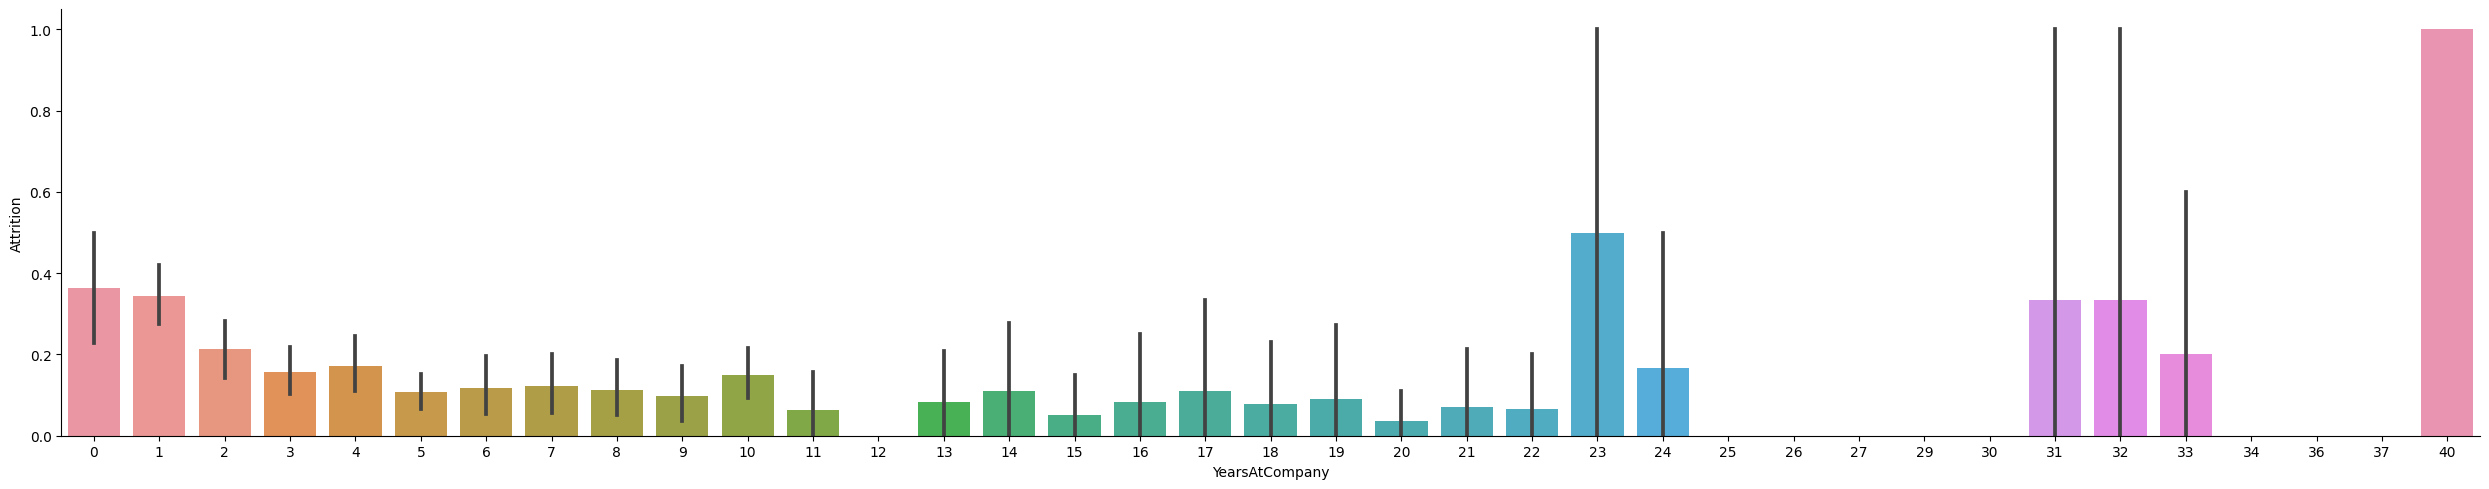

In [17]:
sns.catplot(x = "YearsAtCompany", y = "Attrition", aspect = 5,kind = 'bar',data = emp)
plt.show()

6.Plotting Environment Satisfaction and Attrition

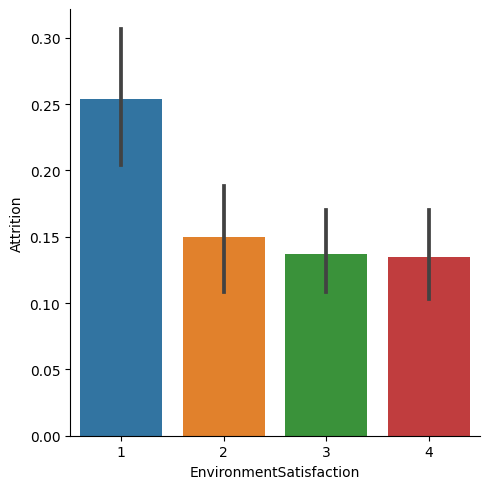

In [95]:
sns.catplot(x = "EnvironmentSatisfaction", y = "Attrition", aspect = 1,kind = 'bar',data = emp)
plt.show()

People having low environment satisfaction tend to have higher attrition rate.

7. Plotting OverTime and Attrition

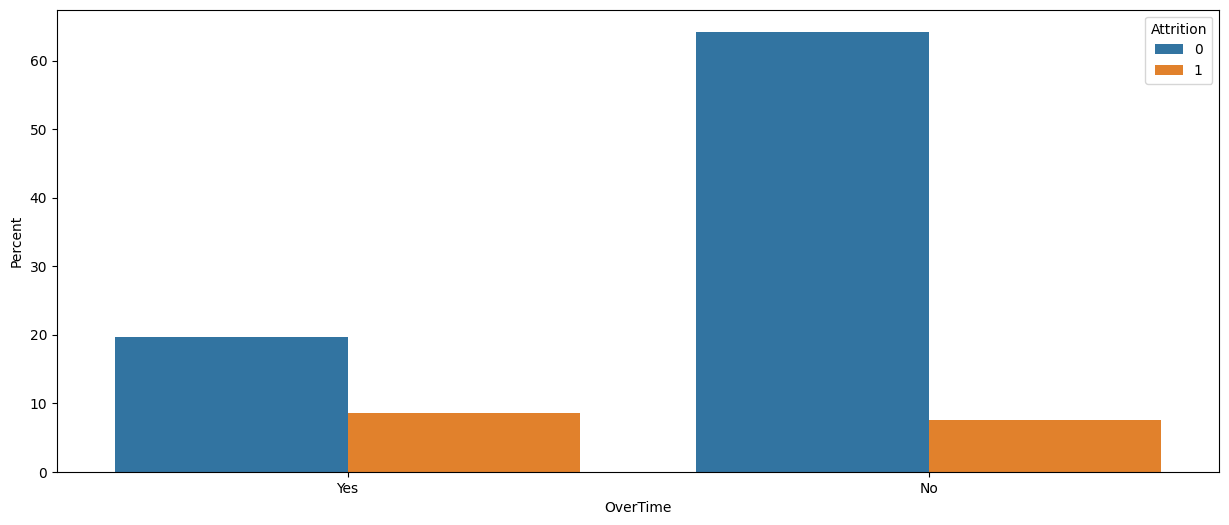

In [92]:
ax = sns.barplot(x="OverTime", y="MonthlyIncome", hue="Attrition", data=emp, estimator=lambda x: len(x) / len(emp) * 100)
ax.set(ylabel="Percent")
plt.show()

People who overtime have a higher chances of leaving the organization.

8. Plotting Monthly Income and Attrition

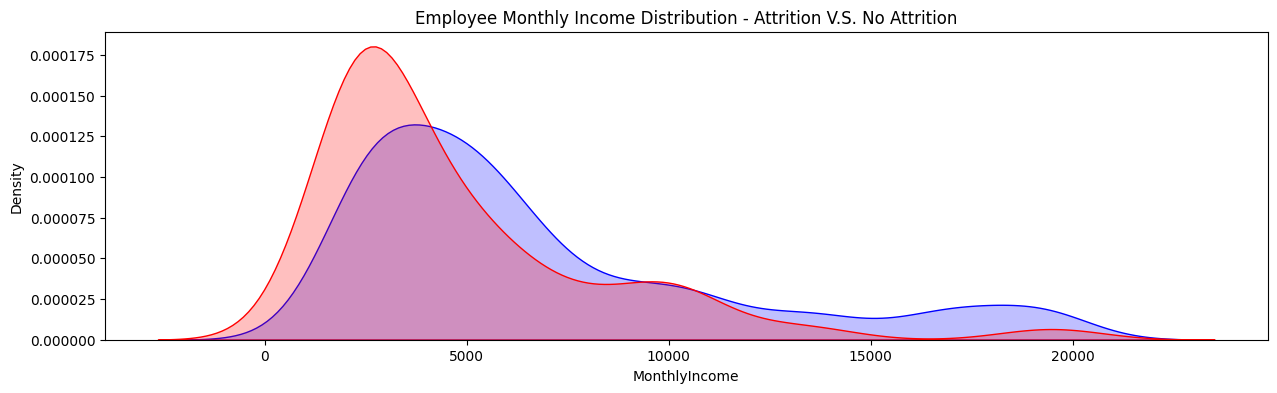

In [79]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(emp.loc[(emp['Attrition'] == 0),'MonthlyIncome'] , color='b',fill=True, label='No Attrition')
ax=sns.kdeplot(emp.loc[(emp['Attrition'] == 1),'MonthlyIncome'] , color='r',fill=True, label='Attrition')
plt.title('Employee Monthly Income Distribution - Attrition V.S. No Attrition')
plt.show()

People with lower monthly income have a higher attrition rate.

PREPROCESSING


Converting Categorical to numerical

In [93]:
emp=pd.get_dummies(data=emp, columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'],drop_first=True)
emp.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,1,0,0,0,0,0,0,1,0,0


In [94]:
emp.keys()

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing 

In [23]:
X=emp.iloc[:, emp.columns!='Attrition']
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


In [24]:
print(emp.Age)

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64


In [25]:
y=emp.Attrition

In [26]:
from sklearn.preprocessing import LabelEncoder
LbEn = LabelEncoder()
y= LbEn.fit_transform(y)
print(y)


[1 0 1 ... 0 0 0]


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape

((1176, 47), (294, 47))

###Feature Selection by Feature importance of Random Classifier

In [28]:
sel=SelectFromModel(RandomForestClassifier(n_estimators=250, random_state=0,n_jobs=-1))
sel.fit(X_train, y_train)
sel.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True])

In [29]:
len(sel.get_support())

47

In [30]:
X_train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
  

In [31]:
features=X_train.columns[sel.get_support()]

In [32]:
features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager', 'OverTime_Yes'],
      dtype='object')

In [33]:
len(features)

21

In [34]:
np.mean(sel.estimator_.feature_importances_)

0.021276595744680857

In [35]:
sel.estimator_.feature_importances_

array([0.05861377, 0.0460228 , 0.04312103, 0.01844171, 0.        ,
       0.04776401, 0.02451045, 0.03974843, 0.02507458, 0.02552971,
       0.02447332, 0.06783709, 0.04496501, 0.0369971 , 0.0332731 ,
       0.00516756, 0.02132288, 0.        , 0.03025715, 0.05012551,
       0.02299995, 0.02037043, 0.03988333, 0.02392536, 0.02067417,
       0.02912566, 0.01470729, 0.00774974, 0.00843175, 0.00802472,
       0.00742961, 0.00685715, 0.00692817, 0.00307076, 0.00744795,
       0.00753674, 0.00320633, 0.00895701, 0.00103152, 0.00290823,
       0.00094629, 0.00579636, 0.00725079, 0.00957826, 0.00789457,
       0.01743328, 0.05658934])

In [36]:
X_train_rfc=sel.transform(X_train)
X_test_rfc=sel.transform(X_test)

In [37]:
def run_randomForest(x_train,x_test,y_tain,y_test):
  clf=RandomForestClassifier(n_estimators=100, random_state=0,n_jobs=-1)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print('Accuracy: ', accuracy_score(y_test,y_pred))
  clf_report = metrics.classification_report(y_test,y_pred)
  print(clf_report)


In [38]:
clf=RandomForestClassifier(n_estimators=100, random_state=0,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [39]:
%%time
run_randomForest(X_train_rfc,X_test_rfc,y_train,y_test)

Accuracy:  0.8503401360544217
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.71      0.11      0.19        47

    accuracy                           0.85       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.83      0.85      0.80       294

CPU times: user 476 ms, sys: 27.1 ms, total: 503 ms
Wall time: 364 ms


Recursive Feature Elimination(RFE)

In [40]:
from sklearn.feature_selection import RFE
sel=RFE(RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1),n_features_to_select=20)
sel.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=250, n_jobs=-1,
                                     random_state=0),
    n_features_to_select=20)

In [41]:
sel.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True])

In [42]:
features=X_train.columns[sel.get_support()]

In [43]:
features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'OverTime_Yes'],
      dtype='object')

In [44]:
len(features)

20

In [45]:
X_train_rfe=sel.transform(X_train)
X_test_rfe=sel.transform(X_test)

In [46]:
%%time
run_randomForest(X_train_rfe,X_test_rfe,y_train,y_test)


Accuracy:  0.8503401360544217
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.71      0.11      0.19        47

    accuracy                           0.85       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.83      0.85      0.80       294

CPU times: user 463 ms, sys: 48 ms, total: 511 ms
Wall time: 380 ms


In [ ]:
%%time
run_randomForest(X_train,X_test,y_train,y_test)

Accuracy:  0.8741496598639455
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       254
           1       0.64      0.17      0.27        40

    accuracy                           0.87       294
   macro avg       0.76      0.58      0.60       294
weighted avg       0.85      0.87      0.84       294

CPU times: user 480 ms, sys: 27.2 ms, total: 507 ms
Wall time: 443 ms


XGBoost Classifier

In [47]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
print(xgb_clf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


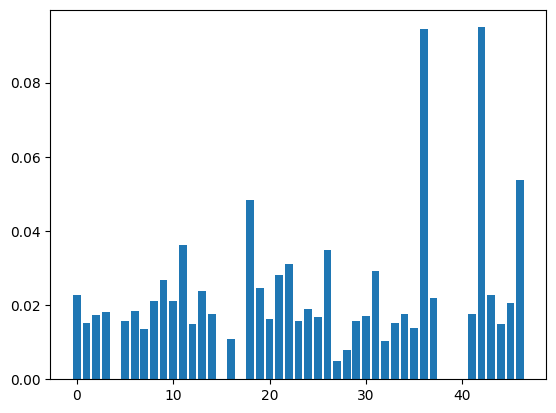

In [49]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb_clf.feature_importances_)), xgb_clf.feature_importances_)
pyplot.show()

In [50]:
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.37%


In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[241   6]
 [ 37  10]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.62      0.21      0.32        47

    accuracy                           0.85       294
   macro avg       0.75      0.59      0.62       294
weighted avg       0.83      0.85      0.82       294



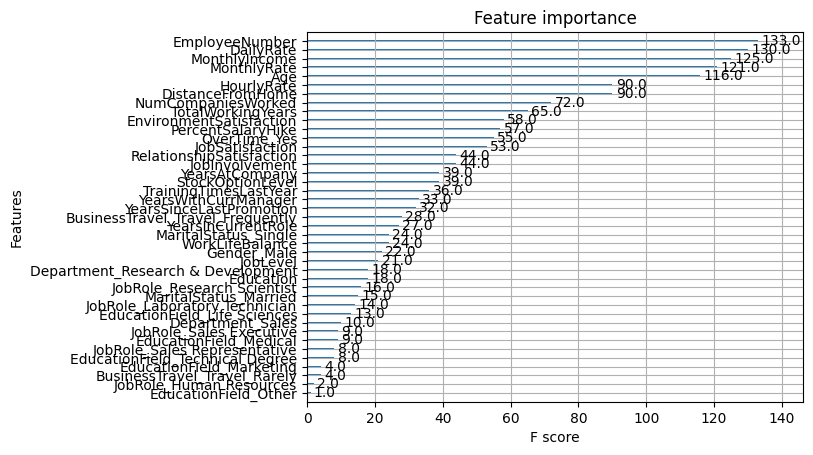

In [55]:
from xgboost import plot_importance
plot_importance(xgb_clf)
pyplot.show()

Adaboost


In [56]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)


AdaBoostClassifier()

In [57]:
# x_train,x_test,y_train,y_test = train_test_split(df_top8,y,test_size=0.25,random_state=0)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
clf = AdaBoostClassifier()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

Accuracy:  0.8367346938775511


Confusion Matrix:  [[234  35]
 [ 13  12]]


Precision:  [0.94736842 0.25531915]
Recall:     [0.86988848 0.48      ]
Fscore:     [0.90697674 0.33333333]
Support:    [269  25]


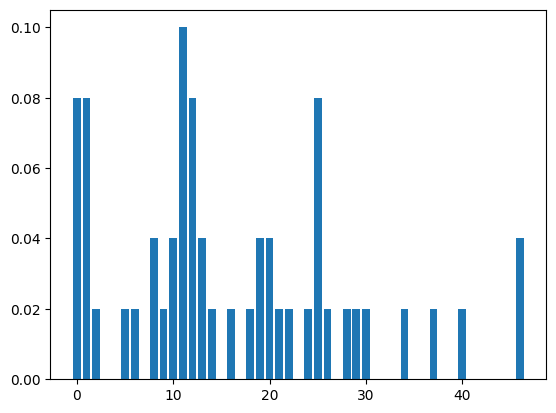

In [61]:
from matplotlib import pyplot
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

In [62]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
model = xgb.XGBClassifier()
abc=model.fit(X_train, y_train)
print()
print(abc)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [63]:
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
clf_report = metrics.classification_report(y_test,y_pred)
print(clf_report)

Accuracy: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.62      0.21      0.32        47

    accuracy                           0.85       294
   macro avg       0.75      0.59      0.62       294
weighted avg       0.83      0.85      0.82       294



Ensemble Technique

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.55      0.13      0.21        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.56       294
weighted avg       0.81      0.84      0.80       294

>LogisticRegression -> 0.839 (0.005)---Employee Attrition dataset
>KNeighborsClassifier -> 0.815 (0.015)---Employee Attrition dataset
>Decision tree -> 0.780 (0.026)---Employee Attrition dataset
>GaussianNB -> 0.762 (0.027)---Employee Attrition dataset
>stacking -> 0.850 (0.016)---Employee Attrition dataset


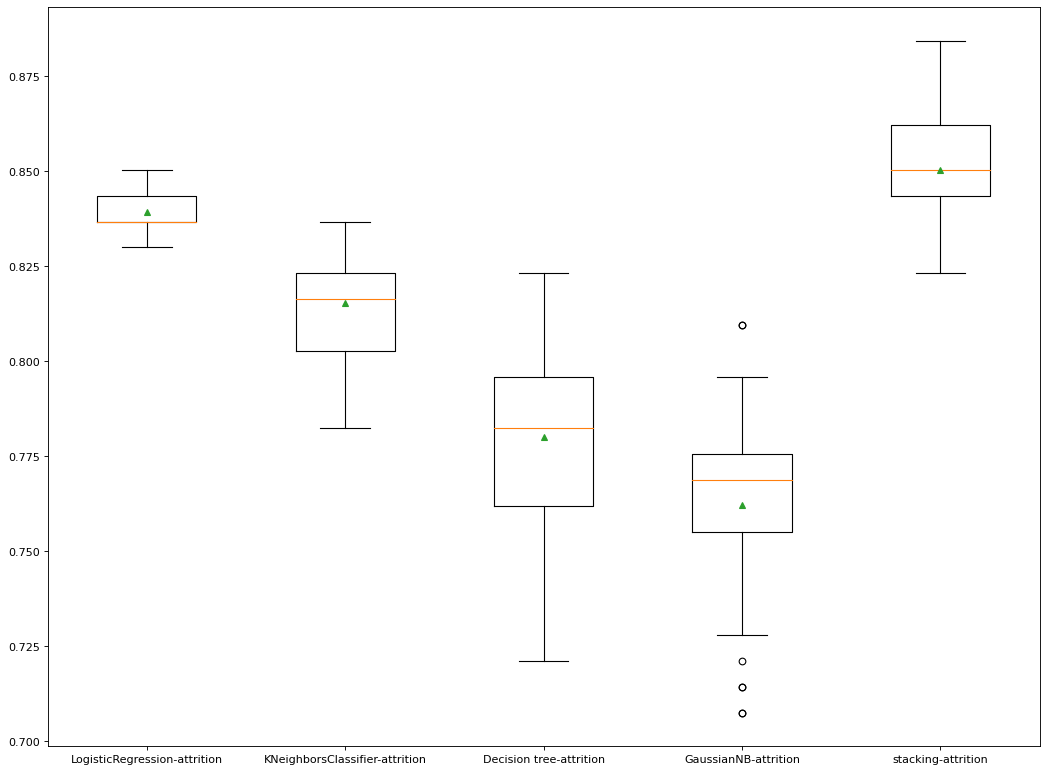

In [96]:
from sklearn.metrics import precision_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn import metrics
figure(num=2, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
 
 
 
# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  # define meta learner model
  level1 = LogisticRegression()
  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  precision = precision_score(y_test, y_pred)
  clf_report = metrics.classification_report(y_test,y_pred)
  print(clf_report)

  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['LogisticRegression'] = LogisticRegression()
  models['KNeighborsClassifier'] = KNeighborsClassifier()
  models['Decision tree'] = DecisionTreeClassifier()
  models['GaussianNB'] = GaussianNB()
  models['stacking'] = get_stacking()
  return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores
 
# define dataset
X,y =emp.iloc[:, emp.columns!='Attrition'],emp.Attrition

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores= evaluate_model(model)
  results.append(scores)
  
  names.append(name)
  print( '>%s -> %.3f (%.3f)---Employee Attrition dataset'% (name, mean(scores), std(scores)))


# plot model performance for comparison
pyplot.rcParams["figure.figsize"] = (15,6)
pyplot.boxplot(results, labels=[s+"-attrition" for s in names], showmeans=True)
pyplot.show()

In [64]:
from sklearn.metrics import precision_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn import metrics
figure(num=2, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1280x960 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.62      0.17      0.27        47

    accuracy                           0.85       294
   macro avg       0.74      0.57      0.59       294
weighted avg       0.82      0.85      0.81       294

>LogisticRegression -> 0.839 (0.005)---Employee Attrition dataset
>KNeighborsClassifier -> 0.815 (0.015)---Employee Attrition dataset
>Decision tree -> 0.780 (0.024)---Employee Attrition dataset
>svm -> 0.839 (0.003)---Employee Attrition dataset
>GaussianNB -> 0.762 (0.027)---Employee Attrition dataset
>stacking -> 0.851 (0.016)---Employee Attrition dataset


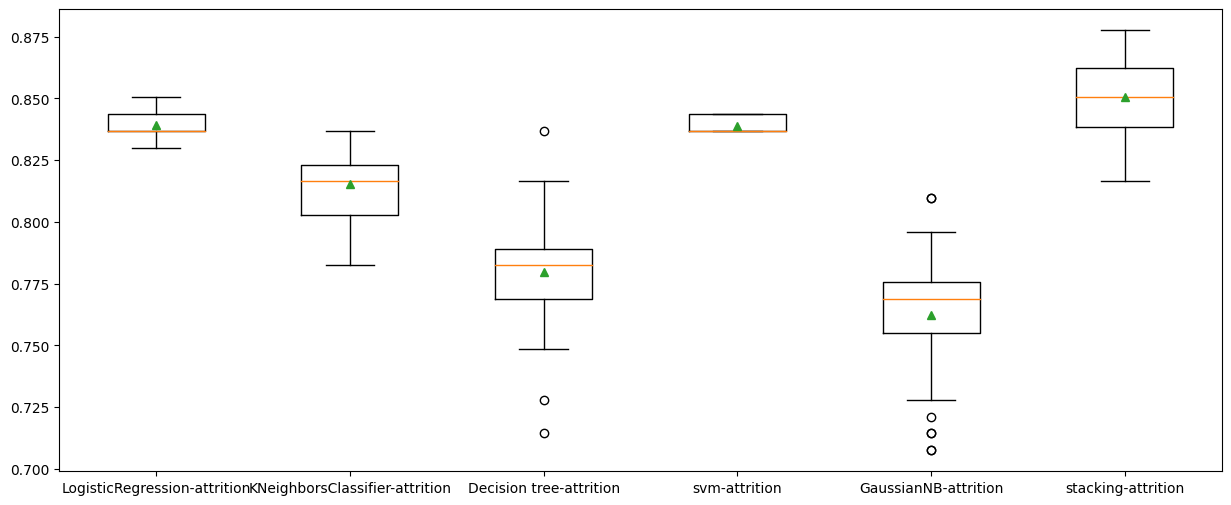

In [65]:
# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  # define meta learner model
  level1 = LogisticRegression()
  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  precision = precision_score(y_test, y_pred)
  clf_report = metrics.classification_report(y_test,y_pred)
  print(clf_report)

  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['LogisticRegression'] = LogisticRegression()
  models['KNeighborsClassifier'] = KNeighborsClassifier()
  models['Decision tree'] = DecisionTreeClassifier()
  models['svm'] = SVC()
  models['GaussianNB'] = GaussianNB()
  models['stacking'] = get_stacking()
  return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  score1 = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')

  return scores
 
# define dataset
X,y =emp.iloc[:, emp.columns!='Attrition'],emp.Attrition

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores= evaluate_model(model)
  score1=evaluate_model(model)
  results.append(scores)
  names.append(name)
  print( '>%s -> %.3f (%.3f)---Employee Attrition dataset'% (name, mean(scores), std(scores)))



# plot model performance for comparison
pyplot.rcParams["figure.figsize"] = (15,6)
pyplot.boxplot(results, labels=[s+"-attrition" for s in names], showmeans=True)
pyplot.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


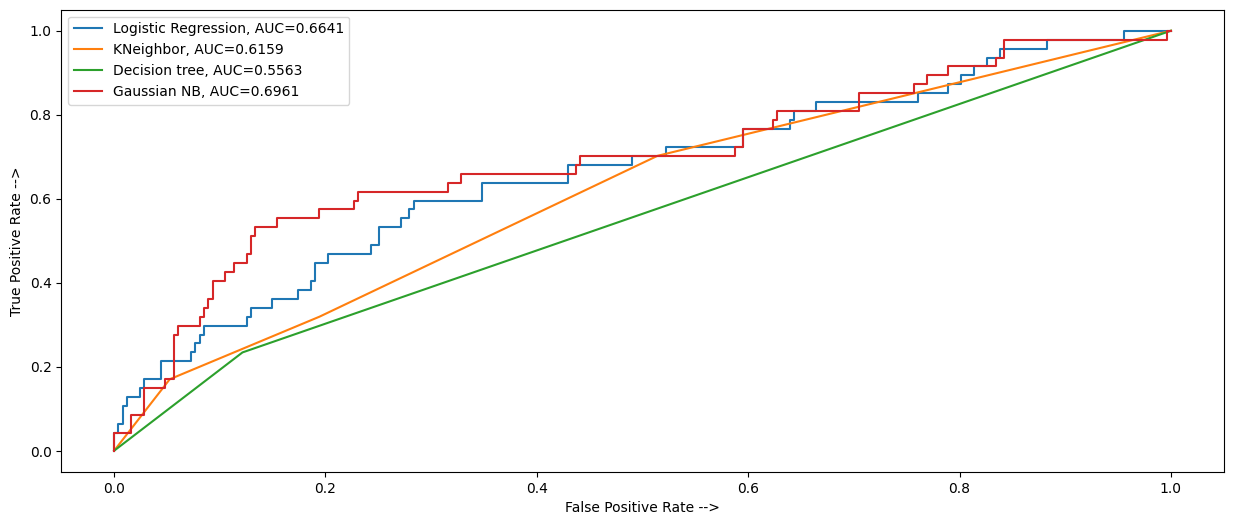

In [97]:
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNeighbor, AUC="+str(auc))

#fit decision tree and plot ROC curve
model =DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision tree, AUC="+str(auc))



model =GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gaussian NB, AUC="+str(auc))
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

#add legend
plt.legend()

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("kNeihbor",KNeighborsClassifier()),
     ("GaussianNB",GaussianNB())
]

# Train and test each model and store the results in a list
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, acc,prec,rec,f1))

# Create a pandas DataFrame to store the results
df_results = pd.DataFrame(results, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


# Print the results
print(df_results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.840136   0.000000  0.000000  0.000000
1        Decision Tree  0.792517   0.305556  0.234043  0.265060
2             kNeihbor  0.823129   0.380952  0.170213  0.235294
3           GaussianNB  0.734694   0.325843  0.617021  0.426471


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
